<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/002_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 2: Quick Style Transfer

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools

def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()
loadThumb('/tmp/yt_thumb_002.png')

#### Video Topics
> 1. Import your images
> 2. Try style transfer
> 3. Save your image
> 4. See you on next video! 

# Import your images
---

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

## Load a content and a style image
--- 

#### Content image

In [ ]:
uploaded = files.upload()
for key in uploaded.keys():
  content_image = key
print(content_image)

Saving dog-4415649_1920.jpg to dog-4415649_1920 (2).jpg
dog-4415649_1920.jpg


### Style Image

In [ ]:
uploaded = files.upload()
for key in uploaded.keys():
  style_image = key
print(style_image)

Saving scream.jpg to scream (2).jpg
scream.jpg


# Import our model
---

Let's introduce some useful functions

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
def load_img(path_to_img):
  max_dim = 1024
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

Let's create a new image!

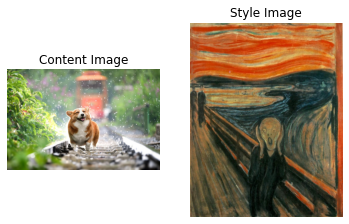

In [ ]:
content_image = load_img(content_image)
style_image = load_img(style_image)

plt.subplot(1, 2, 1)
plt.axis('off')
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
plt.axis('off')
imshow(style_image, 'Style Image')

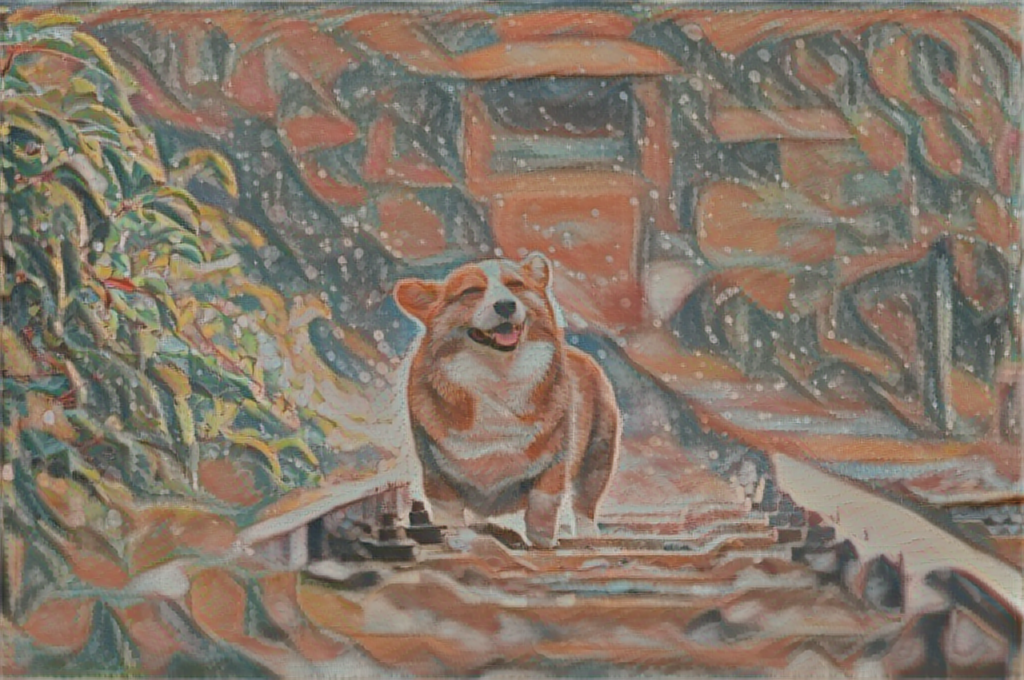

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
image = tensor_to_image(stylized_image)
image

# Save our new image
---

The original work for artistic style transfer with neural networks proposed a slow optimization algorithm that works on any arbitrary painting. Subsequent work developed a method for fast artistic style transfer that may operate in real time, but was limited to one or a limited set of styles. Find out more at [this](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) link!

In [ ]:
file_name = 'stylized-image.png'
image.save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Greetings
---

In [ ]:
!pip install art

In [ ]:
from art import tprint, aprint
tprint('See you on next videos!')

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              



In [ ]:
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)

In [ ]:
# Let's add some final click-bait content
subscribe()

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
